### 9.3.2　使用Python实现算法

In [ ]:
t = 0
s = (0, 0)
v = (1, 0)
a = (0, 0.2)
dt = 2
steps = 5

In [ ]:
from vectors import add, scale
from draw2d import *
positions = [s]
for _ in range(0, steps):
    t += 2
    s = add(s, scale(dt, v))
    v = add(v, scale(dt, a))
    positions.append(s)

draw2d(Points2D(*positions))

练习9.2（小项目）：创建一个函数，对一个不断加速的对象自动执行欧拉方法。你需要为函数提供加速度向量、初始速度向量、初始坐标向量等参数。

In [ ]:
def eulers_method(s0,v0,a,total_time,step_count):
    positions = [s0]
    dt = total_time / step_count
    s = s0
    v = v0
    for _ in range(0, step_count):
        s = add(s, scale(dt, v))
        v = add(v, scale(dt, a))
        positions.append(s)
    return positions

In [ ]:
approx5 = eulers_method((0,0),(1,0),(0,0.2),10,5)
approx100 = eulers_method((0,0),(1,0),(0,0.2),10,100)

In [ ]:
def pairs(lst):
    return list(zip(lst[:-1],lst[1:]))

In [ ]:
from draw2d import *
draw2d(
    Points2D(*approx5, color='C0'),
    *[Segment2D(t,h,color='C0') for (h,t) in pairs(approx5)],
    Points2D(*approx100, color='C1'),
    *[Segment2D(t,h,color='C1') for (h,t) in pairs(approx100)]
    )

练习9.4（小项目）：任何抛射物，如抛出的棒球、子弹或空中的滑雪板，都有同样的加速度向量：$9.8m/s^2$，指向地心。如果我们把平面中的$x$轴看成平地，$y$轴正方向指向上方，就相当于加速度向量为（0,-9.81）。如果在处从肩高位置抛出一个棒球，我们可以说它的初始坐标是（0,1.5）。假设它以$30m/s$的初速度从轴正方向向上20°的角度抛出，用欧拉方法模拟它的轨迹。棒球沿轴正方向大约走了多远才落地？

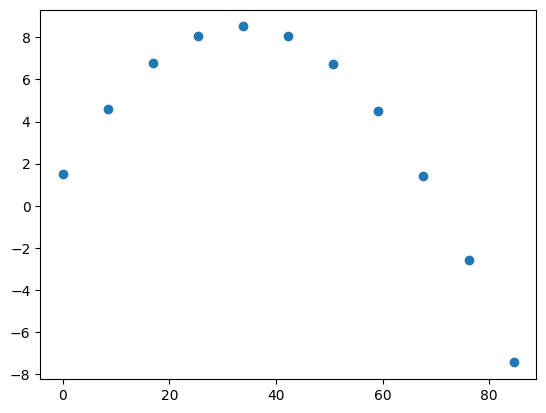

In [60]:
import math
s0 = (0, 1.5)
v0 = (30*math.cos(math.pi/9), 30*math.sin(math.pi/9))
a = (0, -9.81)
positions = eulers_method(s0, v0, a, 3, 10)
xs, ys = zip(*positions)
plt.scatter(xs, ys)

练习9.6（小项目）：一个对象在三维空间中运动，其初速度为(1, 2, 0)，加速度向量恒定为(0, -1, 1)。如果它从原点出发，10秒后会在哪里？请用第3章的绘图函数绘制它的三维轨迹。

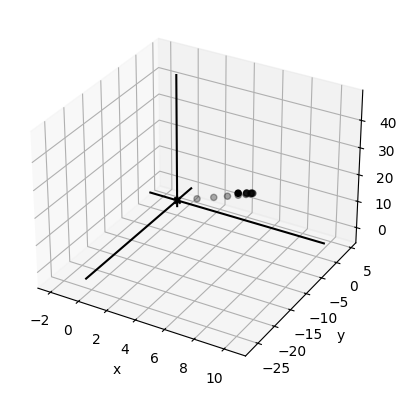

In [61]:
from draw3d import *
traj3d = eulers_method((0,0,0), (1,2,0), (0,-1,1), 10, 10)
draw3d(Points3D(*traj3d))